This is Bryan Allen's submission for IDB10's Final Porfolio for skills of Python-Jupyter-Pandas-GitHub programming. It is based on a popular database of nutrition data from McD's Menu Items in India! There are three Q's I am curious to know and will attempt to answer using data manipulation:
1.) What is the most unhealthy item on the Menu?
2.) What item has HIGHEST ratio of sugar to serving size?
3.) What item has HIGHEST ration of sodium to serving size?
I hope that some these insights can help our programmer friends on Indian sub-continent make healthy choices for themselve and their
familes and responsibly enjoy these unique Indian-American treats. Who knows, maybe some of them will choose to work with McDs in future

### Table of Contents
* [Section 1: Importing Necessary Libraries and Data](#section1)
* [Section 2: Previewing Data](#section2)
* [Section 3: Data Cleaning](#section3)
* [Section 4: Answering 3 Questions from the Data](#questions)
* [Section 5: Building the Model](#section4)
* [Section 6: Testing Custom Data](#section5)

<a class="anchor" id="section1"></a>
<h2 style="color: #808080; background-color:#808080; text-align:center; border: 3px solid #808080"><span style="color:black">Importing Necessary Libraries and Data</span></h2>

In [47]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt

NOTE: My project contains modules and libraries that are named according to MY naming convetions, since I am owner of this Notebook. I'm aware that on teams the standard naming convention is to create abbreviated aliases, and so when I'm on those teams I'll defer to their conventions, but if the project is mine I will name the modules whatever looks the coolest.

Some programmers have asked why I do this, and the simple answer is that python code to me is fun to type, and it's beautiful to look at, that's all.

- Bryan Allen, apprentice Data Engineer
Lusaka Zambia August 2022


In [48]:
dataframe = pandas.read_csv('India_Menu.csv')
print("Taking a look at the head and tail of our DB can quickly give us an idea how long and how wide is the DB we're working with. Also we'll get rough idea how much cleaning our data will require")
print()
print(dataframe.head(2))
print(dataframe.tail(2))

Taking a look at the head and tail of our DB can quickly give us an idea how long and how wide is the DB we're working with. Also we'll get rough idea how much cleaning our data will require

  Menu Category            Menu Items Per Serve Size  Energy (kCal)  \
0  Regular Menu      McVeggie™ Burger          168 g         402.05   
1  Regular Menu  McAloo Tikki Burger®          146 g         339.52   

   Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  Cholesterols (mg)  \
0        10.24          13.83         5.34           0.16               2.49   
1         8.50          11.31         4.27           0.20               1.47   

   Total carbohydrate (g)  Total Sugars (g)  Added Sugars (g)  Sodium (mg)  
0                   56.54              7.90              4.49       706.13  
1                   50.27              7.05              4.07       545.34  
       Menu Category            Menu Items Per Serve Size  Energy (kCal)  \
139  Condiments Menu            Sweet Corn    

In [49]:
item_count = dataframe['Menu Items'].count()
print("There are", item_count, "items in the dataframe")
print("Let's take look at our column headers as a list")
list(dataframe.columns)

There are 141 items in the dataframe
Let's take look at our column headers as a list


['Menu Category',
 'Menu Items',
 'Per Serve Size',
 'Energy (kCal)',
 'Protein (g)',
 'Total fat (g)',
 'Sat Fat (g)',
 'Trans fat (g)',
 'Cholesterols (mg)',
 'Total carbohydrate (g)',
 'Total Sugars (g)',
 'Added Sugars (g)',
 'Sodium (mg)']

<a class="anchor" id="section3"></a>
<h2 style="color:#808080; background-color:#808080; text-align:center; border: 3px solid #000000"><span style="color:black">Data Cleaning</span></h2>

In [50]:
for col in list(dataframe.columns):
    ## print(dataframe[col].str.replace(u"\u2122",''))
    dataframe[col] = dataframe[col].astype(str).str.replace(u"\u2122",'')

In [51]:
for col in list(dataframe.columns):
    ## print(dataframe[col].str.replace(u"\u2122",''))
    dataframe[col] = dataframe[col].astype(str).str.replace("®",'')

In [52]:
for i in range(len(dataframe['Per Serve Size'])):
    curr_cell = dataframe['Per Serve Size'][i]
    curr_cell = curr_cell.split(' ')
    dataframe['Per Serve Size'][i] = curr_cell[0]
    i += 1

In [53]:
print(dataframe['Total Sugars (g)'].dtype)
print(dataframe['Per Serve Size'].dtype)
dataframe['Per Serve Size'] = dataframe['Per Serve Size'].astype(float)
dataframe['Total Sugars (g)'] = dataframe['Total Sugars (g)'].astype(float)
print(dataframe['Total Sugars (g)'].dtype)
print(dataframe['Per Serve Size'].dtype)

object
object
float64
float64


In [54]:
print(dataframe.head(10))

  Menu Category              Menu Items  Per Serve Size Energy (kCal)  \
0  Regular Menu         McVeggie Burger           168.0        402.05   
1  Regular Menu     McAloo Tikki Burger           146.0        339.52   
2  Regular Menu   McSpicy Paneer Burger           199.0        652.76   
3  Regular Menu       Spicy Paneer Wrap           250.0        674.68   
4  Regular Menu     American Veg Burger           177.0        512.17   
5  Regular Menu        Veg Maharaja Mac           306.0        832.67   
6  Regular Menu  Green Chilli Aloo Naan           132.0        356.09   
7  Regular Menu              Pizza Puff            87.0        228.21   
8  Regular Menu       Mc chicken Burger           173.0         400.8   
9  Regular Menu    FILLET-O-FISH Burger           136.0        348.11   

  Protein (g) Total fat (g) Sat Fat (g) Trans fat (g) Cholesterols (mg)  \
0       10.24         13.83        5.34          0.16              2.49   
1         8.5         11.31        4.27       

In [55]:
num_unique_cats = dataframe["Menu Category"].nunique()
print("There are", num_unique_cats,"unique categories of menu items. Let's take look at them:")
print(dataframe["Menu Category"].value_counts())
print()
print("Hey, this looks like good opportunity create a Histogram!")
print("Let's visualize the dispersion of these categories")
print()
menu_cat_values = (dataframe["Menu Category"].value_counts())
## dataframe.plot.hist(menu_cat_values.astype(int))
## dataframe.plot.hist(num_unique_cats)
## print(menu_cat_values)

There are 7 unique categories of menu items. Let's take look at them:
McCafe Menu        51
Regular Menu       36
Beverages Menu     17
Breakfast Menu     15
Gourmet Menu       11
Condiments Menu     9
Desserts Menu       2
Name: Menu Category, dtype: int64

Hey, this looks like good opportunity create a Histogram!
Let's visualize the dispersion of these categories



What item has HIGHEST ratio of sugar to serving size?
In order try answer this Q I will utilize a scatterplot, with serving
size for x-axis and sugars on the y-axis. Later I will do some arithmetic
to calculate the respecive ratios but first let's visualize that data!

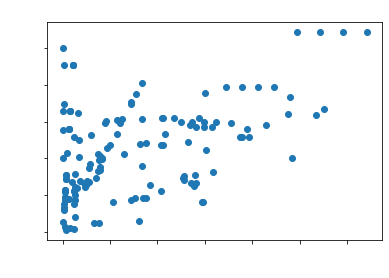

In [63]:
x = numpy.array(dataframe['Total Sugars (g)'])
y = numpy.array(dataframe['Per Serve Size'])
plt.scatter(x, y)
plt.title("Gimme some Sugar!", fontweight ="bold", color ="white")
plt.xlabel("Total Sugars in grams", fontweight ="bold", color ="white")
plt.ylabel("Serving Size in grams", fontweight ="bold", color ="white")
plt.xticks(fontsize= 10, color ="white")
plt.yticks(fontsize= 10, color ="white")
plt.show()
## @IDBdev IDK why ticks so stupid looking


In [66]:
## print(dataframe.head(25))
temp_df = dataframe[['Menu Items','Total Sugars (g)', 'Per Serve Size']].value_counts().reset_index()
dataframe['ratio_sugar'] = round(dataframe['Total Sugars (g)'] / dataframe['Per Serve Size'] * 100, 2)

print()
dataframe[['Menu Items', 'Total Sugars (g)', 'Per Serve Size', 'ratio_sugar']]

,Menu Items,Total Sugars (g),Per Serve Size,ratio_sugar
0,McVeggie Burger,7.90,168.0,4.70
1,McAloo Tikki Burger,7.05,146.0,4.83
2,McSpicy Paneer Burger,8.35,199.0,4.20
3,Spicy Paneer Wrap,3.50,250.0,1.40
4,American Veg Burger,7.85,177.0,4.44
...,...,...,...,...
136,Tomato Ketchup Sachets,2.33,8.0,29.12
137,Maple Syrup,16.20,30.0,54.00
138,Cheese Slice,0.54,14.0,3.86
139,Sweet Corn,2.54,40.0,6.35
